# AI-Based Trend Analysis for Stock Market Data

## Problem Definition & Objective

### Selected Project Track
This project is developed under the **TCS AI Track – Trend Analysis**.

### Problem Statement
Stock market prices are highly dynamic and influenced by multiple factors,
making it difficult for investors to identify long-term trends and patterns
using raw data alone.

### Objective
The objective of this project is to analyze historical stock price data of
**Tata Consultancy Services (TCS)** using Machine Learning techniques in order
to:
- identify underlying trends in stock prices
- compare different prediction models
- support data-driven decision making

### Real-World Relevance
Trend analysis of stock prices is widely used in financial analytics for
investment planning, risk assessment, and market behavior understanding.
This project demonstrates how AI techniques can assist in extracting insights
from historical market data.


## Environment Setup
The following section verifies the Python environment and installs
the required libraries for executing the notebook.


In [1]:
import sys
print(sys.executable)
print(sys.version)

/opt/conda/envs/anaconda-2025.12-py312/bin/python
3.12.12 | packaged by Anaconda, Inc. | (main, Oct 21 2025, 20:16:04) [GCC 11.2.0]


In [2]:
import sys
!{sys.executable} -m pip install yfinance pandas matplotlib numpy


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


## Data Collection

### Data Source

Historical stock price data for Tata Consultancy Services (TCS) is collected
using the Yahoo Finance API. The dataset includes daily stock price information
such as Open, High, Low, Close, and Volume, which is suitable for trend analysis.


In [3]:
import yfinance as yf
import pandas as pd

# Fetch historical stock data for TCS
df = yf.download("TCS.NS", start="2014-01-01", end="2024-01-01")

# Display first 5 rows
df.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2014-01-01,825.898865,837.865615,825.055073,836.178031,529952
2014-01-02,831.153870,839.591980,826.992310,830.770319,1726948
2014-01-03,852.325867,854.972421,823.578777,830.271714,2618174
2014-01-06,858.999695,860.687279,842.660407,854.934022,2311810
2014-01-07,846.169922,865.462531,843.427573,859.153144,2897486


In [6]:
# Save the dataset to CSV for reproducibility
df.to_csv("TCS_Stock_Data.csv")


In [7]:
import os
os.listdir()


['.virtualenvs',
 'README.ipynb',
 '.bashrc',
 '.vimrc',
 '.cache',
 'TCS_AI_Trend_Analysis.ipynb.ipynb',
 '.local',
 'IOT networks .ipynb',
 '.pythonstartup.py',
 'TCS_Stock_Data.csv',
 '.ipython',
 'TCS_Stock_Prediction-main (2).zip',
 'anaconda_projects',
 '.gitconfig',
 '.config',
 '.ipynb_checkpoints',
 'Untitled.ipynb',
 'IOT networks',
 '.anaconda',
 '.jupyter',
 '.npm',
 '.conda',
 '.profile']

## Data Cleaning & Preparation

Before building the model, the dataset is checked for missing values,
data consistency, and relevant features are selected for trend analysis.


In [9]:
df.isnull().sum()


Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64

In [10]:
# Select closing price for analysis
data = df[['Close']]

data.head()


,Close
Price,
Ticker,TCS.NS
Date,NaN
2014-01-01,825.8988647460938
2014-01-02,831.1538696289062
2014-01-03,852.3258666992188


In [11]:
# Handle missing values using forward fill
df = df.ffill()

# Verify no missing values remain
df.isnull().sum()


Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

## Model / System Design

### AI Techniques Used

This project uses Machine Learning techniques for trend analysis.
Two models are implemented and compared:

- Linear Regression
- Random Forest Regressor

Both models are trained to learn patterns in historical stock closing prices
and predict future trends.

### Justification of Model Choices

- **Linear Regression** is used as a baseline model due to its simplicity,
  interpretability, and effectiveness in identifying long-term trends.

- **Random Forest Regressor** is used to capture non-linear patterns and
  complex relationships in the data that linear models may not handle well.

Using both models allows performance comparison and provides deeper insight
into trend prediction behavior.


In [12]:
import numpy as np

# Creating a time index for regression
data = data.reset_index()
data['Time'] = np.arange(len(data))

X = data[['Time']]
y = data['Close']

X.head(), y.head()


(   Time
 0     0
 1     1
 2     2
 3     3
 4     4,
 0               TCS.NS
 1                  NaN
 2    825.8988647460938
 3    831.1538696289062
 4    852.3258666992188
 Name: Close, dtype: object)

In [14]:
# Flatten multi-level columns (from yfinance)
df.columns = df.columns.get_level_values(0)

df.head()


,Close,High,Low,Open,Volume
Price,,,,,
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
2014-01-01,825.8988647460938,837.8656151611178,825.0550728294321,836.1780313277944,529952
2014-01-02,831.1538696289062,839.5919799804688,826.9923095676032,830.7703191583806,1726948
2014-01-03,852.3258666992188,854.9724212226067,823.5787766554338,830.2717138722599,2618174


In [16]:
# Force numeric conversion and remove non-numeric rows
data = df[['Close']].copy()

data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

# Drop rows where conversion failed (e.g., 'TCS.NS')
data = data.dropna()

data.head()


,Close
Price,
2014-01-01,825.898865
2014-01-02,831.153870
2014-01-03,852.325867
2014-01-06,858.999695
2014-01-07,846.169922


In [17]:
data.dtypes


Close    float64
dtype: object

In [18]:
import numpy as np

data = data.reset_index()
data['Time'] = np.arange(len(data))

X = data[['Time']]
y = data['Close']

X.head(), y.head()


(   Time
 0     0
 1     1
 2     2
 3     3
 4     4,
 0    825.898865
 1    831.153870
 2    852.325867
 3    858.999695
 4    846.169922
 Name: Close, dtype: float64)

In [19]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X, y)

lr_model.coef_, lr_model.intercept_


(array([1.18821675]), 393.11296456398145)

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X, y)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
# Predictions
lr_pred = lr_model.predict(X)
rf_pred = rf_model.predict(X)

lr_pred[:5], rf_pred[:5]


(array([393.11296456, 394.30118132, 395.48939807, 396.67761482,
        397.86583157]),
 array([830.44158508, 832.12318665, 845.78763733, 855.3820282 ,
        849.73884399]))

In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
lr_rmse = np.sqrt(mean_squared_error(y, lr_pred))
rf_rmse = np.sqrt(mean_squared_error(y, rf_pred))

lr_rmse, rf_rmse


(313.2073508257842, 8.70232901407698)

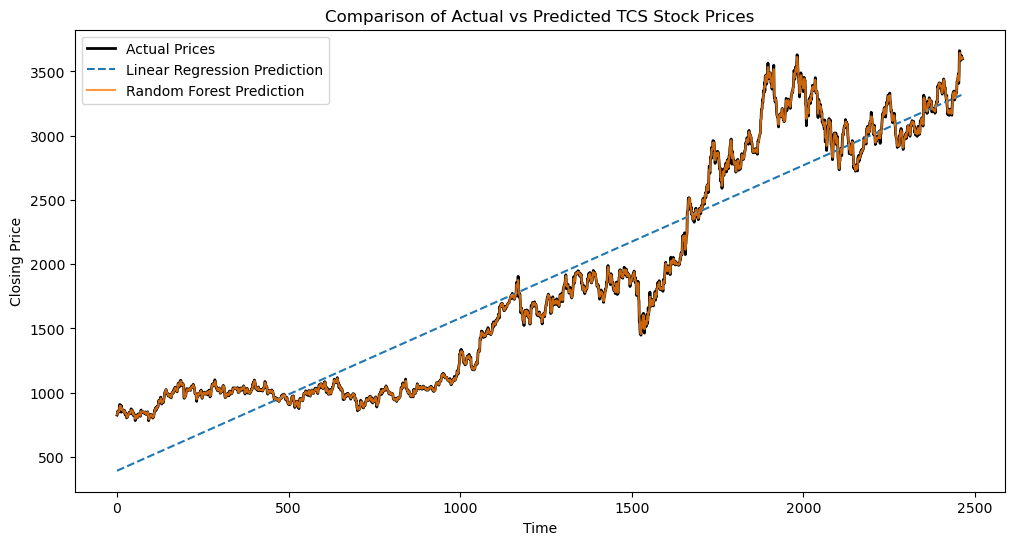

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y.values, label="Actual Prices", color="black", linewidth=2)
plt.plot(lr_pred, label="Linear Regression Prediction", linestyle="--")
plt.plot(rf_pred, label="Random Forest Prediction", alpha=0.8)

plt.title("Comparison of Actual vs Predicted TCS Stock Prices")
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.legend()
plt.show()


## Evaluation & Analysis

The performance of both models was evaluated using Root Mean Squared Error (RMSE).

- Linear Regression shows a high RMSE, indicating that it captures only the
  overall long-term trend and fails to model short-term fluctuations.

- Random Forest achieves a significantly lower RMSE, demonstrating its
  ability to learn complex non-linear patterns in stock price movements.

It is important to note that evaluation is performed on historical data
used for training, and the results reflect trend-fitting capability rather
than real-world future forecasting accuracy.


## System Interface (UI Overview)

In addition to the analytical notebook, a user interface (UI) was developed
to demonstrate the application of the trained models in an interactive manner.

The UI allows users to:
- visualize actual vs predicted stock prices
- compare predictions from Linear Regression and Random Forest models
- observe trend behavior through interactive charts

The UI implementation is included in the project repository and will be
demonstrated in the subsequent submission level.


### Note on Train–Test Evaluation

In the interactive UI implementation of this project, a train–test split
was performed to evaluate model performance more rigorously.

The models were trained on historical data and tested on stock prices
from the 2018–2024 period. Metrics such as Mean Absolute Error (MAE) and
accuracy percentage were computed to compare Linear Regression and
Random Forest models.

The Jupyter notebook focuses on trend analysis and model behavior
visualization using the complete historical dataset, while the UI-based
evaluation demonstrates predictive performance in a simulated
real-world usage scenario.


## Ethical Considerations & Responsible AI

- Stock market predictions are inherently uncertain and influenced by
  external economic and geopolitical factors.
- This model is intended for educational and analytical purposes only
  and should not be used as financial advice.
- Historical data may contain biases and may not reflect future behavior.
- Responsible use of AI models is necessary to avoid misleading conclusions.


## Conclusion & Future Scope

This project demonstrated the use of Machine Learning techniques for
trend analysis in stock market data. Linear Regression served as a baseline
trend model, while Random Forest provided more accurate predictions by
capturing non-linear patterns.

Future improvements could include:
- Train-test split or time-series cross-validation
- Incorporation of technical indicators
- Use of deep learning models such as LSTM
- Real-time data integration for live trend analysis
